This experiment covers the Normal AM Modulation and Demodulation in the time and frequency domains.

Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Introducción: Modulación AM

En esta sección produciremos la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


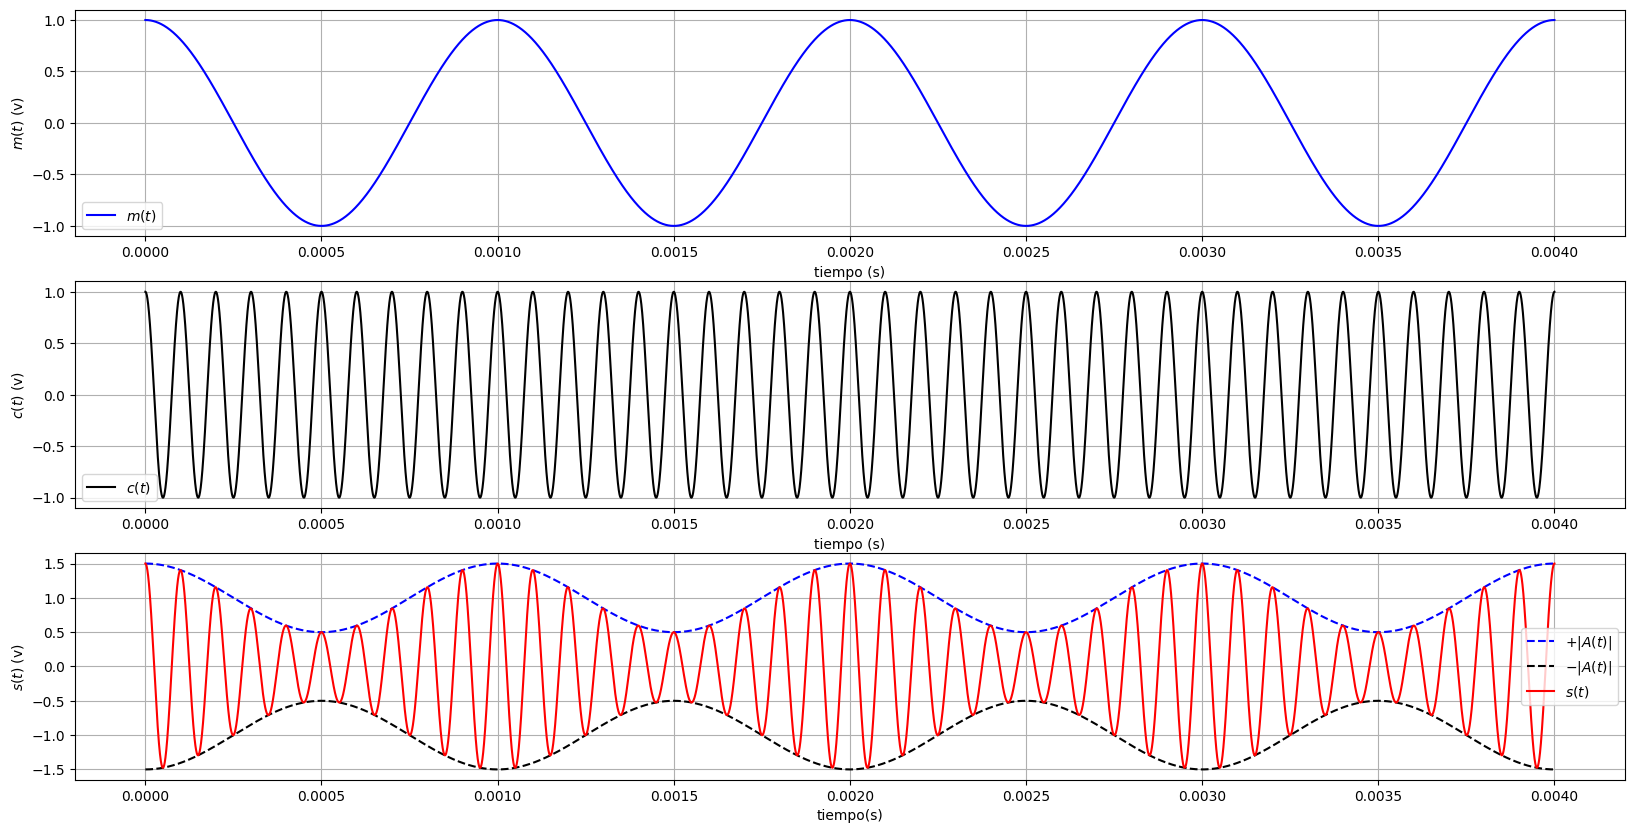

In [3]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


# Parámetros involucrados en la modulación AM.


Observemos la señal de mensaje $m(t)=A_mcos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

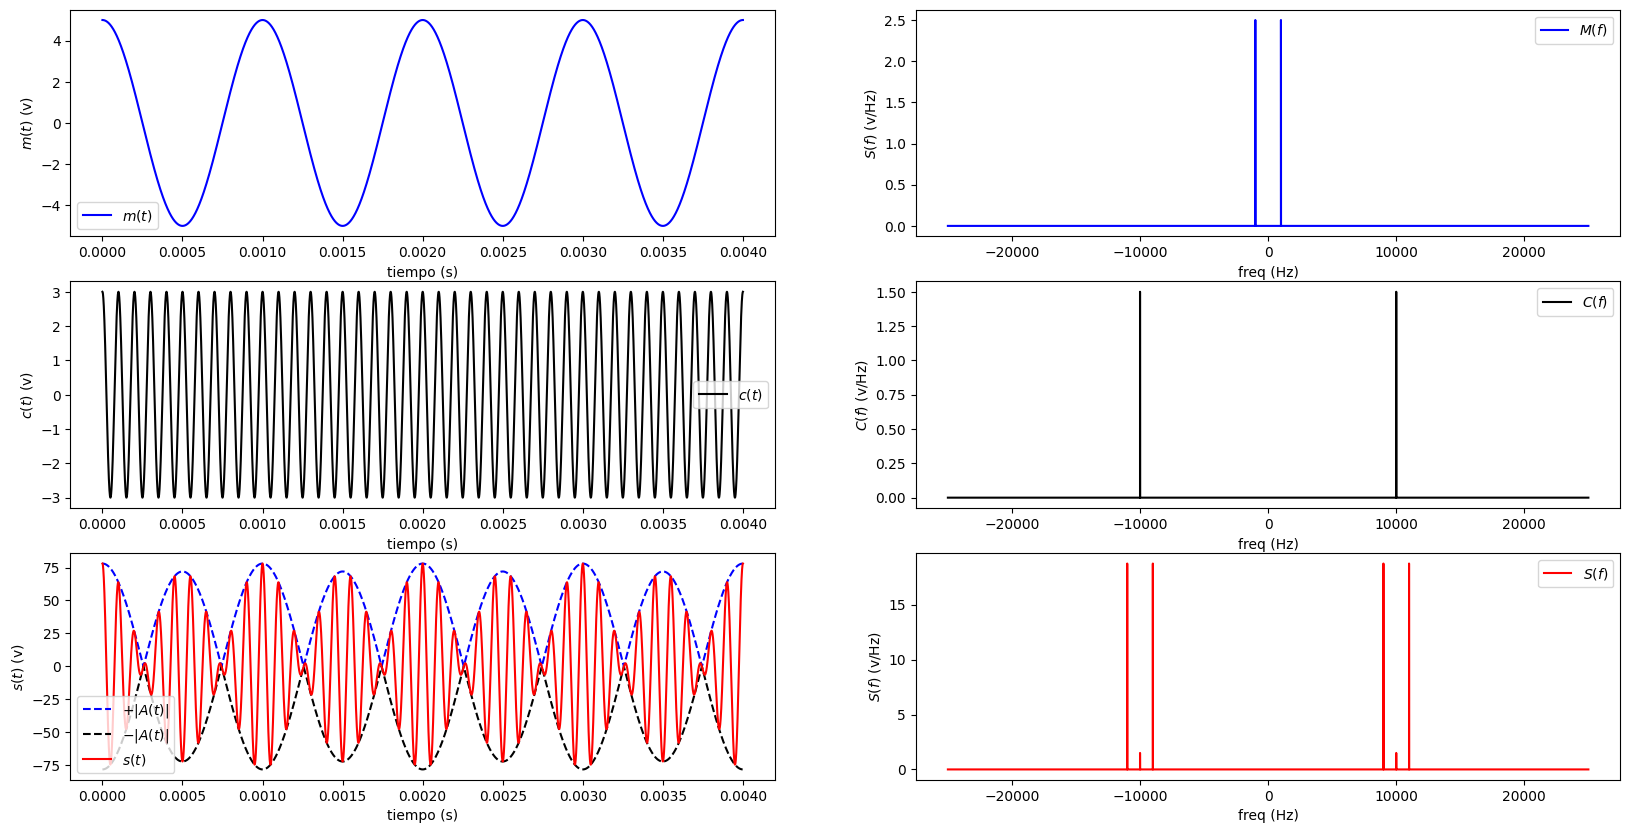

In [4]:
Am=5 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=3 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=5 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


a) Al variar la frecuencia $f_m$, se puede notar que el espectro de la señal mensaje va variando según el dato modificado; sin embargo, en el espectro de la señal modulada se puede apreciar que la frecuencia varía la magnitud de fm después de las funciones deltas de la frecuencia $f_c$. \\
b) Si se modifica la frecuencia de la señal portadora, se puede apreciar que la señal modulada varía su frecuencia directamente con la frecuencia $f_c$; sin embargo, modificando $f_c$ se puede apreciar que el espectro de la señal modulada varía, donde la función delta dirac con mayor amplitud es la determinada por la frecuencia $f_c$. \\
c) Modificando $A_m$ se puede apreciar que en la señal modulada varía de amplitud, donde en el espectro de la señal modulada se puede apreciar que las funciones delta dirac pertenecientes a la señal mensaje aumentan de amplitud al aumentar $A_m$, teniendo una amplitud mayor a la amplitud de la delta dirac perteneciente a la señal portadora. \\
d) Si se modifica la amplitud $A_c$, la señal modulada varará el mismo rango que el valor $A_c$, donde la señal modificada, la parte azul tiene una amplitud de $\frac{A_c}{2}$. Si se analiza el espectro de la señal modulada, este tendrá una amplitud igual a $\frac{A_c}{2}$. \\
e) Al variar $K_a$, se puede ver que solo puede variar entre $0$ y $1$, donde $0$ la señal se mantiene constante y en $1$ la parte azul y la parte negra tienen puntos tangentes entre sí, pero si es mayor a 1, la parte azul y la parte negra se solapan y se cruzan entre sí. Con respecto al espectro, se puede observar que al variar $K_a$ las funciones delta dirac varían directamente con respecto a dicho parámetro.

**Ver: Ejercicios indicados en el planteamiento del proyecto**

# Efecto de cambiar el índice de modulación $\mu$

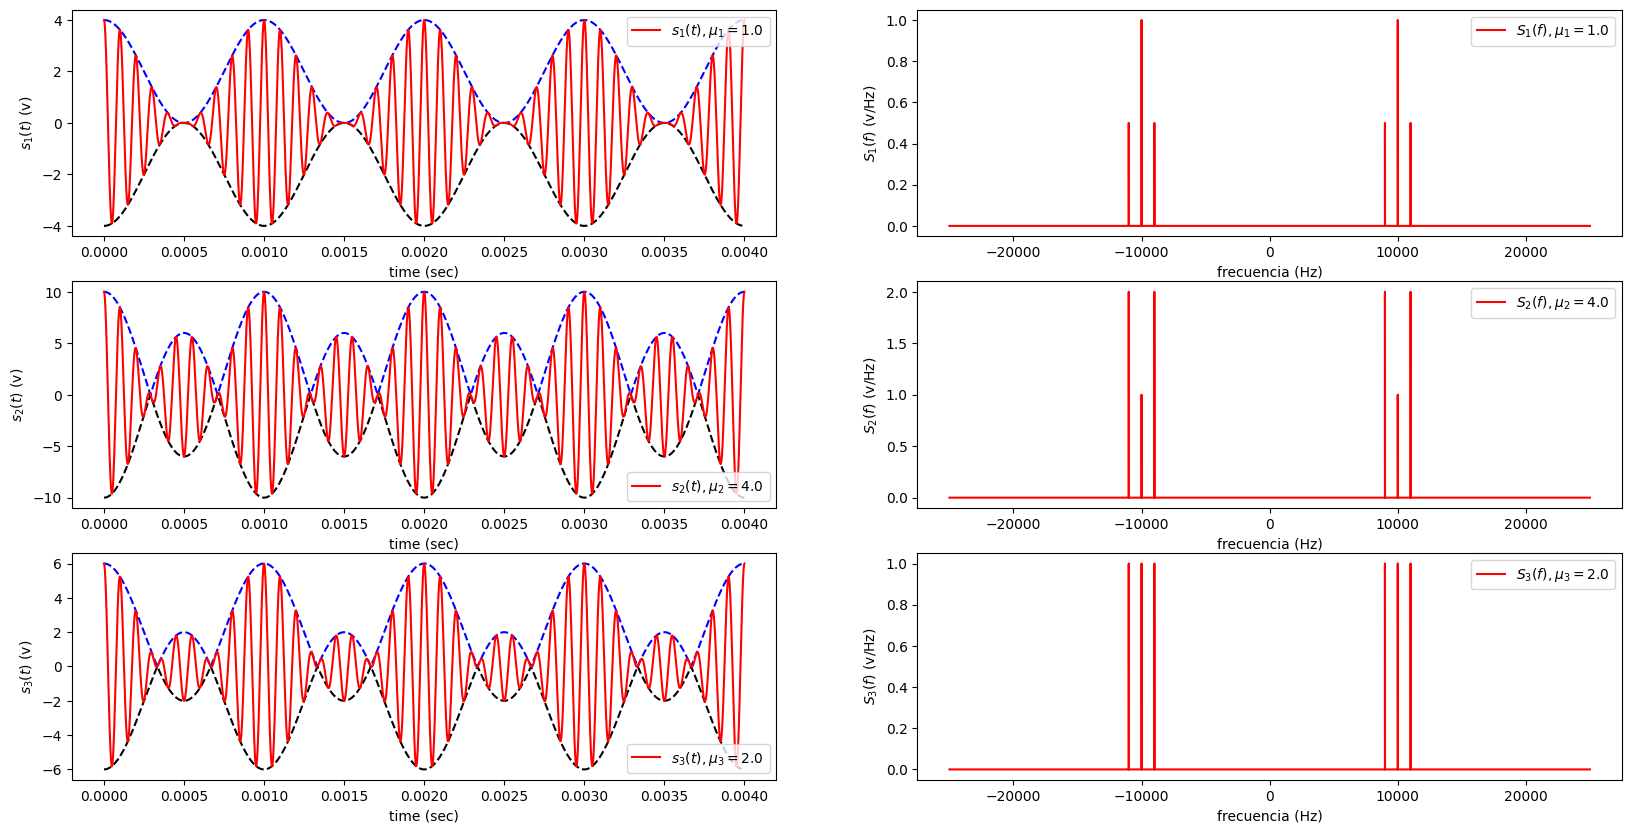

In [ ]:
Am1=5  # Amplitud de la señal de mensaje 1
Am2=20 # Amplitud de la señal de mensaje 2
Am3=10 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=0.2 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

**Ver Ejercicios en el planteamiento del proyecto**

a) Al variar el parámetro de $A_1$, se puede apreciar que la señal roja llega a tener una amplitud de $A_1$ veces $K_a$, así que si se modifica $A_1$, la amplitud de la señal roja aumenta el doble de lo modificado. Para el espectro, se puede apreciar que este aumenta a una amplitud a la modificada en el parámetro $A_1$. Para la señal 2, se puede apreciar que al modificar el parámetro de $A_2$, esta señal roja aumenta $4$ veces la amplitud modificada, con respecto al espectro, si se modifica el parámetro $A_2$, la amplitud del espectro será del valor de $A_2$. Para la señal 3, al modificar $A_3$, la amplitud de la señal roja aumenta $4$ veces la amplitud; sin embargo, al no estar centrada en el origen, no se puede ver claramente dicho cambio. Con respecto a al espectro, este varía directamente proporcional a la variación de $A_3$, teniendo una amplitud de las funciones delta dirac de $A_3$. \\
b) Al modificar el parámetro $K_a$ se puede apreciar a que la amplitud en la señal modificada varía a proporción a la modificación del parámetro $K_a$; de igual forma, al modificar $K_a$, el espectro de la señal se ve modificado al variar dicho parámetro, siendo si el producto entre la amplitud de la señal de mensaje y el parámetro $K_a$ es mayor a $2$, los delta dirac de los extremos son menores en amplitud, si el producto entre la amplitud de la señal de mensaje y el parámetro $K_a$ es igual a $2$, los delta dirac de los extremos y el centro son el mismo y finalmente, si el producto entre la amplitud de la señal de mensaje y el parámetro $K_a$ es menor a $2$, los delta dirac de los extremos son mayores en amplitud a comparación al del centro.

# Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [ ]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [ ]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

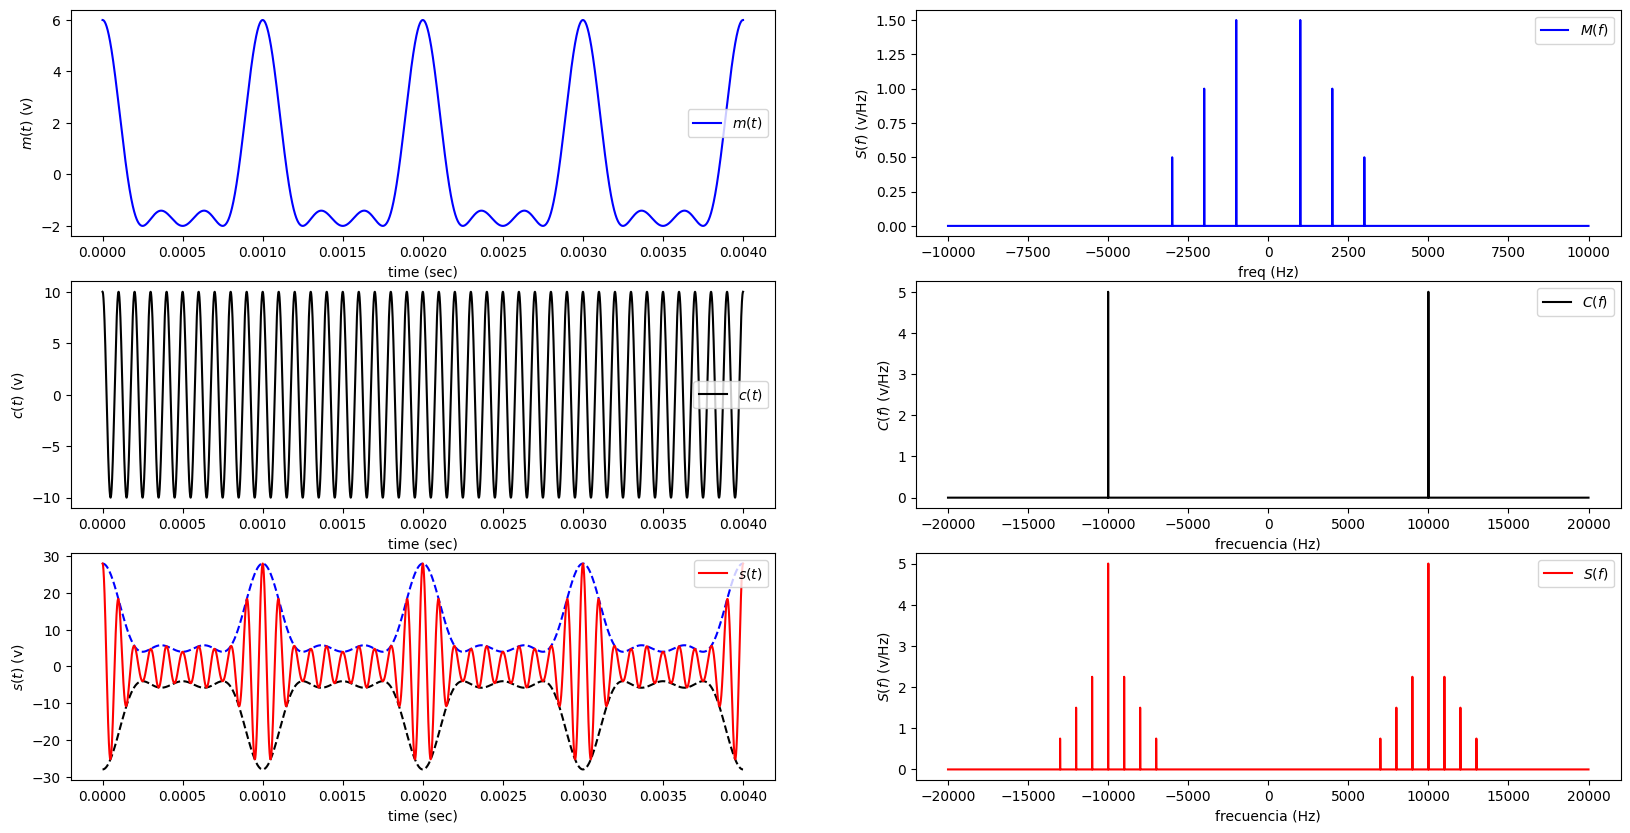

In [ ]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=10 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

a) Al modificar las frecuencias $f_{m1} $, $f_{m2}$ y $f_{m3}$, se puede apreciar que la señal azul (señal de mensaje), si se aumentan las frecuencias, la señal tiene mayor rapidez, es decir, se hace más angosta la longitud de pico a pico, y si se disminuye el parámetro, la señal se hace más lenta. En el espectro se pueden notar tres delta dirac del lado positivo y 3 delta dirac del lado negativo de la gráfica del espectro, donde cada delta dirac está posicionada en el valor de los parámetros $f_{m1}$, $f_{m2}$ y $f_{m3}$. \\
b) Si se modifica el parámetro $f_c$, en la señal portadora se ve que va más rápido o más lento, dependiendo si se modifica con valores más altos o más bajos, respectivamente; en la señal modulada se puede ver que al disminuir la frecuencia, la señal portadora es más lenta y no se adapta muy bien a la señal mensaje; sin embargo, si se aumenta el valor de la frecuencia $f_c$ se puede apreciar que la señal va lo suficientemente rápido para adaptarse a la señal mensaje y así poder modular la señal. El espectro al ser una combinación de las frecuencias, se puede apreciar que la frecuencia $f_c$ tiene un espectro en forma de la función delta dirac posicionada en el valor de la frecuencia. \\
c) Modificando las amplitudes $A_{m1} $, $A_{m2}$ y $A_{m3}$ se puede ver que la señal mensaje se ve modificada proporcionalmente a la modificación de dichas amplitudes, donde en el espectro se puede ver que las amplitudes del espectro son de la forma $\frac{A_{mn}}{2}$, siendo $A_{mn}$ la amplitud de cada componente y $n$ un número natural. También se puede ver que la señal portadora se adapta a los cambios de las amplitudes $A_{m1} $, $A_{m2}$ y $A_{m3}$, para así tener una señal modulada de manera correcta. \\
d) $A_c$ al ser modificado, este en la señal portadora se puede apreciar a que tiene una amplitud igual al parámetro; sin embargo, el espectro de la señal portadora es de la forma $\frac{A_{c}}{2}$. Además, se puede apreciar que la señal modulada tiene una amplitud de la forma $3A_c$. Con respecto al espectro, se puede ver que las amplitudes de los espectros delta dirac pertenecientes a la señal mensaje se ven modificados a un aproximado de $A_c\cdot\frac{A_{mn}}{6}$, así que un aproximado de la amplitud de los espectros pertenecientes a la señal mensaje son directamente proporcionales a la amplitud $A_c$; además, se puede notar que el espectro de la señal modulada perteneciente a la señal portadora se ve modificada a una razón de $\frac{A_{c}}{2}$.

**Conclusiones** \\
Se puede concluir que los parámetros más significativos al analizar la modulación AM de una señal son determinados mediante la amplitud de la señal mensaje, la frecuencia de la señal mensaje, la amplitud de la señal portadora y la frecuencia de la señal portadora. Además, se concluye que al modificar un parámetro sin tomar en cuenta los demás mencionados anteriormente no se puede lograr una exitosa modulación AM para la señal mensaje de interés.